# Machine Learning and Statistics Assignment, 2020
***

## Task 1
The first task is to write a Python function called `sqrt2` that returns the square root of 2 to 100 decimal spaces without making use of any imported modules. 

There are several known methods [1]. Here, we will look at two methods. Note that the methods described below only calculate the square root of whole numbers, not real numbers. 

### Method 1: Newton's Method
This method is thought to date back to the Babylonians circa 1000 BC [2]. It determines the square root of a number with increasing accuracy through each iteration. This is achieved in the following way [3]:

1. **Make a reasonable guess for the square root**

   A reasonable way would be to identify the nearest whole integer that, when squared, comes closest to the value  under investigation. The following piece of `code` demonstrates:

In [1]:
#Find largest integer n whose square is less than the number under investigation, in this case, 10

# Value of number for which square root is sought
num = 20

# Variable to contain answer
nearestValue = 0

# Loop through all options until exact integer found, or i*i > num 
for i in range(num):
    if i*i < num:
        continue
    if i*i == num:
        nearestValue = i
        break
    if i*i > num:
        nearestValue = i-1
        break
        
# Prevent instances where nearestValue = 0
if nearestValue == 0:
    nearestValue = 1

In [2]:
# Print largest integer 
print("The nearest value which when squared is less than the number under investigation is: ", nearestValue)

2. **Increase the precision of the approximate guess**

   Add the above guessed root value to the original number under investigation divided by the guessed root value, and divide this final figure by 2: 
   
$$x^{next} = \frac{(x^{current} + \frac{n}{x^{current}})}{2}$$
   
   

In [3]:
# Increase the precision of the answer from the previous step
nextNum = (nearestValue + (num/nearestValue))/2

nextNum

4.5

3. **Repeat until the desired precision is achieved**

   The `nextNum` value from step 2 gets reused in the calculation as the next best approximate guess until the desired precision of answer is achieved

In [4]:
# Use the previous answer as the next value in the equation
nearestValue = nextNum

# Repeat the equation
nextNum = (nearestValue + (num/nearestValue))/2

nextNum

4.472222222222222

These steps can be placed into a single Python function, here called `sqrtNewton` [3]. In this example, the user can adapt the precision as needed.

In [5]:
# Define variables
precision = 10 ** (-10) # Specify number of decimal spaces
num = 2 # Specify the number of which square root is sought

# Create function
def sqrtNewton(num):
    # Find nearest value as starting guesstimate
    nearestValue = 0
    
    for i in range(num):
        if i*i < num:
            continue
        if i*i == num:
            nearestValue = i
            break
        if i*i > num:
            nearestValue = i-1
            break
    
    # Prevent instances where nearestValue = 0
    if nearestValue == 0:
        nearestValue = 1
        
    # Loop through the equation until value with desired precision is identified
    while abs(num - (nearestValue * nearestValue)) > precision:
        nearestValue = (nearestValue + (num / nearestValue)) / 2
    
    # Return the value to the specified precision
    return nearestValue

#Print result
print("The square root of", num, "to the precision of", precision, "decimal spaces is", sqrtNewton(num))


The square root of 2 to the precision of 1e-10 decimal spaces is 1.4142135623746899


The **problem** here is that the display does not show beyond the 16th decimal space. The Python `decimal` module allows specifying the number of decimal spaces to display [4]; however, the instructions for this task clearly stated that no imported modules are to be used. This is where the second method comes in.

## Method 2: Long Division Algorithm
This method makes use of long division calculations by hand to determine each successive number in a square root answer [5]. Because it allows determining each number in turn, it can be used to create a string of undetermined length without the limitation of decimal spaces display that is inherent in method 1. There are several steps involved:

1. **Seperate the digits into pairs**

This step is not needed, given that the issue here is the number of digits *after* the decimal. For whole numbers, the computer will be able to determine the square root without needing to break down into pairs.

2. **Find the largest integer**

As before, this can be done with a `for` loop.

In [6]:
#Find largest integer n whose square is less than the number under investigation

# Value of number for which square root is sought
num = 1234

# Variable to contain answer
nearestValue = 0

# Loop through all options until exact integer found, or i*i > num 
for i in range(num):
    if i*i < num:
        continue
    if i*i == num:
        nearestValue = i
        break
    if i*i > num:
        nearestValue = i-1
        break
        
# Prevent instances where nearestValue = 0
if nearestValue == 0:
    nearestValue = 1
        
# Print nearest integer
print("The nearest value which when squared is less than the number under investigation is: ", nearestValue)

The nearest value which when squared is less than the number under investigation is:  35


This value now becomes the next number in the answer, and is added to the answer string

In [7]:
#Create final answer string variable
ans = ''

# Add number to string
ans += str(nearestValue)
print(ans)

35


3. **Subtract square of largest integer from current number**

The square of the value from the previous step is subtracted from the current number. The answer of this difference will now be added to the front of the next digit pair to create a new value to investigate.

In [8]:
#Calculate square of nearestValue
sqrNearestValue = nearestValue * nearestValue
# print(sqrNearestValue)

#Subtract sqrNearestValue from num
nextNumber = num - sqrNearestValue
print(nextNumber)

9


4. **Move to the next pair of values in the number under investigation**

Place the next two values next to the answer calculated in the step above. Where no values exist, use zeros instead. To achieve this, one can merely multiple the answer above by 100.

In [9]:
#Multiply nextNumber by 100
nextNumber = nextNumber * 100
print('nextNumber: ', nextNumber)

nextNumber:  900


Multiply the current answer by 2. This will be used in the next step

In [10]:
#Multiply current ans by 2
currentAnswer = int(ans) * 2
print('currentAnswer: ', currentAnswer)

currentAnswer:  70


5. **Find the right value match**

The next step is to use the value from the previous step, and identify what single integer, when placed at the end of that value and the whole value is multiplied by the same integer, is less than or equal to the nextNumber.

In [11]:
#Identify the integer that completes the following equation and is less than the nextNumber: currentAnswery * y <= nextNumber
for i in range(1,11): #up to 11 to include the possibility of 9 being the integer
    testNumber = int(str(currentAnswer) + str(i)) * i
    if testNumber < nextNumber:
        continue
    if testNumber == nextNumber:
        nextAnswer = i
        testNumber = int(str(currentAnswer) + str(i)) * i
        # print('integer i is: ', i)
        break
    if testNumber > nextNumber:
        nextAnswer = i - 1
        testNumber = int(str(currentAnswer) + str(i-1)) * (i-1)
        #print('integer i is: ', i-1)
        break
print('testNumber: ', testNumber)
print('nextAnswer: ',nextAnswer)

testNumber:  701
nextAnswer:  1


This `nextAnswer` value then becomes the next value in the root answer.

In [12]:
#Add nextAnswer to answer
ans += str(nextAnswer)
print('ans: ',ans)

ans:  351


6. **Identify the next number**

Once again, subtract the total of the value identified in step 5 from the value on the left

In [13]:
#Get the nextNumber
lastNumber = nextNumber
nextNumber = lastNumber - testNumber
print('lastNumber:', lastNumber)
print('testNumber:', testNumber)
print('nextNumber:', nextNumber)

lastNumber: 900
testNumber: 701
nextNumber: 199


7. **Repeat steps 4 to 6 for the total number of decimal spaces required**

Repeat the steps until you have total number of decimal spaces required in the answer. This can be achieved by placing the above into a `while` loop as below.

In [14]:
#FROM HERE TO END LOOPS UNTIL 100 DECIMAL SPACES#
while len(ans) < (100 + nearestValue):
#Multiply nextNumber by 100
    nextNumber = nextNumber * 100
    #print('nextNumber: ', nextNumber)

    #Multiply current ans by 2
    currentAnswer = int(ans) * 2
    #print('currentAnswer: ', currentAnswer)

    #Identify the integer that completes the following equation and is less than the nextNumber: currentAnswery * y <= nextNumber
    for i in range(1,11): #up to 11 to include the possibility of 9 being the integer
        testNumber = int(str(currentAnswer) + str(i)) * i
        if testNumber < nextNumber:
            continue
        if testNumber == nextNumber:
            nextAnswer = i
            testNumber = int(str(currentAnswer) + str(i)) * i
            #print('integer i is: ', i)
            break
        if testNumber > nextNumber:
            nextAnswer = i - 1
            testNumber = int(str(currentAnswer) + str(i-1)) * (i-1)
            #print('integer i is: ', i-1)
            break
    #print('testNumber: ', testNumber)
    #print('nextAnswer: ',nextAnswer)

    #Add nextAnswer to answer
    ans += str(nextAnswer)
    #print('ans: ',ans)

    #Get the nextNumber
    lastNumber = nextNumber
    nextNumber = lastNumber - testNumber
    #print('nextNumber: ', nextNumber)
    #print('line break - next iteration starts after this')
    #print()
    
print("ans: ", ans)

ans:  351283361405005916058703116253563067645404854787765405690202683926394175654576700713118864847740795362187533615970865896869519707927067


The issue, however, is that the answer does not contain a decimal point. Inserting the decimal point can be done by determining the length of the string created by the `nearestValue`, and inserting a decimal point into the string after that value. For example, the square root of 16 is 4. The length of 4 as a string is 1, therefore the decimal will be placed after the first digit in the string. Likewise, the square root of 120 is 10.95. The `nearestValue` for calculating the square root of 120 is 10 ($10^2 = 100$). The length of 10 as a string is 2. Therefore, the decimal point will be placed after the second digit in the string. And so on.

In [15]:
#Place decimal point at appropriate place
ans = ans[0:len(str(nearestValue))] + '.' + ans[len(str(nearestValue)):]
print("ans: ", ans)

ans:  35.1283361405005916058703116253563067645404854787765405690202683926394175654576700713118864847740795362187533615970865896869519707927067


The final `function` for the long division algorithm which incorporates all of the steps is below. The commented out `print` statements are for debugging purposes.

In [16]:
def sqrtLongDiv(num, decSpaces):
    largestInteger = 0
    ans = ''
    nextAnswer = 0

    #Find largest integer n whose square is less than num
    for i in range(num+1):
        if i*i < num:
            continue
        if i*i == num:
            largestInteger = i
            break
        if i*i > num:
            largestInteger = i-1
            break
    #print(largestInteger)
    
    # Prevent instances where largestInteger = 0
    if largestInteger == 0:
        largestInteger = 1

    #Add integer to answer
    ans += str(largestInteger)
    #print(ans)

    #Calculate square of largestInteger
    sqrLargestInteger = largestInteger*largestInteger
    #print(sqrLargestInteger)

    #Subtract sqrLargestInteger from num
    nextNumber = num - sqrLargestInteger
    #print(nextNumber)

    #FROM HERE TO END LOOPS UNTIL 100 DECIMAL SPACES#
    while len(ans) < (decSpaces + len(str(largestInteger))):
    #Multiply nextNumber by 100
        nextNumber = nextNumber * 100
        #print('nextNumber: ', nextNumber)

        #Multiply current ans by 2
        currentAnswer = int(ans) * 2
        #print('currentAnswer: ', currentAnswer)

        #Identify the integer that completes the following equation and is less than the nextNumber: currentAnswery * y <= nextNumber
        for i in range(1,11): #up to 11 to include the possibility of 9 being the integer
            testNumber = int(str(currentAnswer) + str(i)) * i
            if testNumber < nextNumber:
                continue
            if testNumber == nextNumber:
                nextAnswer = i
                testNumber = int(str(currentAnswer) + str(i)) * i
                #print('integer i is: ', i)
                break
            if testNumber > nextNumber:
                nextAnswer = i - 1
                testNumber = int(str(currentAnswer) + str(i-1)) * (i-1)
                #print('integer i is: ', i-1)
                break
        #print('testNumber: ', testNumber)
        #print('nextAnswer: ',nextAnswer)

        #Add nextAnswer to answer
        ans += str(nextAnswer)
        #print('ans: ',ans)

        #Get the nextNumber
        lastNumber = nextNumber
        nextNumber = lastNumber - testNumber
        #print('nextNumber: ', nextNumber)
        #print('line break - next iteration starts after this')

    #Place decimal point at appropriate place
    ans = ans[0:len(str(largestInteger))] + '.' + ans[len(str(largestInteger)):]

    return ans

#Run function with designated number
num = 123
decSpaces = 20
print("The long division square root of", num,"to", decSpaces,"decimal spaces is", sqrtLongDiv(num, decSpaces))

The long division square root of 123 to 20 decimal spaces is 11.09053650640941716205


## Final output as required

The brief requested a single function `sqrt2` to 100 decimal spaces. Below is that function and output.

In [17]:
def sqrt2():
    largestInteger = 0
    ans = ''
    nextAnswer = 0
    num = 2

    #Find largest integer n whose square is less than num
    for i in range(num+1):
        if i*i < num:
            continue
        if i*i == num:
            largestInteger = i
            break
        if i*i > num:
            largestInteger = i-1
            break

    #print(largestInteger)

    #Add integer to answer
    ans += str(largestInteger)
    #print(ans)

    #Calculate square of largestInteger
    sqrLargestInteger = largestInteger*largestInteger
    #print(sqrLargestInteger)

    #Subtract sqrLargestInteger from num
    nextNumber = num - sqrLargestInteger
    #print(nextNumber)

    #FROM HERE TO END LOOPS UNTIL 100 DECIMAL SPACES#
    while len(ans) < (100 + len(str(largestInteger))):
    #Multiply nextNumber by 100
        nextNumber = nextNumber * 100
        #print('nextNumber: ', nextNumber)

        #Multiply current ans by 2
        currentAnswer = int(ans) * 2
        #print('currentAnswer: ', currentAnswer)

        #Identify the integer that completes the following equation and is less than the nextNumber: currentAnswery * y <= nextNumber
        for i in range(1,11): #up to 11 to include the possibility of 9 being the integer
            testNumber = int(str(currentAnswer) + str(i)) * i
            if testNumber < nextNumber:
                continue
            if testNumber == nextNumber:
                nextAnswer = i
                testNumber = int(str(currentAnswer) + str(i)) * i
                #print('integer i is: ', i)
                break
            if testNumber > nextNumber:
                nextAnswer = i - 1
                testNumber = int(str(currentAnswer) + str(i-1)) * (i-1)
                #print('integer i is: ', i-1)
                break
        #print('testNumber: ', testNumber)
        #print('nextAnswer: ',nextAnswer)

        #Add nextAnswer to answer
        ans += str(nextAnswer)
        #print('ans: ',ans)

        #Get the nextNumber
        lastNumber = nextNumber
        nextNumber = lastNumber - testNumber
        #print('nextNumber: ', nextNumber)
        #print('line break - next iteration starts after this')

    #Place decimal point at appropriate place
    ans = ans[0:len(str(largestInteger))] + '.' + ans[len(str(largestInteger)):]

    return ans

# Print out answer
print("The square root of 2 to 100 decimal spaces is:")
print(sqrt2())

The square root of 2 to 100 decimal spaces is:
1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


## Compare answer

The algorithm veracity is tested against a string of the square root of 2 calculated to 1 million digits [6]. Note how there is no multi-line wrapping of the imported string - this will give you an error, as it reads in a `\n` character.

In [18]:
#Get string from website extract
nasaImport = '1.41421356237309504880168872420969807856967187537694807317667973799073247846210703885038753432764157273501384623091229702492483605585073721264412149709993583141322266592750559275579995050115278206057147010955997160597027453459686201472851'

#Create string of 100 decimal spaces (up to 102 values to include first digit and decimal point)
sqrt2Nasa = nasaImport[0:102]

#print(len(sqrt2()))
#print(len(sqrt2Nasa))

#Compare Nasa string with algorithm
print("The function sqrt2 is equal to the first 100 decimal spaces of the square root of 2 as calculated by Nasa:", sqrt2Nasa == sqrt2())


The function sqrt2 is equal to the first 100 decimal spaces of the square root of 2 as calculated by Nasa: True


***

## Task 2
The second task is to calculate the Chi-square test statistic of a table in Wikipedia [7] using `scipy.stats`, and confirm that the value is 24.6. In addition, the task asks to calculate the associated *p* value.

### Chi-square test
The Chi square test is a statistical hypothesis test used to test for a relationship between categorical variables. It assumes that the variables being investigated are categorical and independent [8]. It determines whether there is a relationship by comparing the *expected* values to the *observed* values for each category [9]. As per any statistical test, it assumes a null hypothesis of no relationship; if the Chi square statistic is significantly different from a  critical value (determined by the degrees of freedom), then the null hypothesis is rejected. 

### Chi-square calculation
The Chi-square statistic is the sum of the observed value minus the expected value squared, divided by the expected value, for each category. This is presented as follows [10]:

\begin{equation}
\chi^2=\Sigma\frac{(O-E)^2}{E} \\
\text{where O is the actual value and E is the expected value.}
\end{equation}

The expected value is determined by multiplying the row total by the column total, and dividing the answer by the grand total, as follows:

$$expected\ value\ = \frac{row\ total\ x\ column\ total}{grand\ total}$$


### Table of observed values
The table from Wikipedia is presented below:

In [19]:
#Import necessary modules
import pandas as pd

#Generate table - adapted from: https://towardsdatascience.com/gentle-introduction-to-chi-square-test-for-independence-7182a7414a95
cells = pd.DataFrame([[90, 60, 104, 95], #Row 1, White collar
         [30, 50, 51, 20],  #Row 2, Blue collar
         [30, 40, 45, 35]   #Row 3, No collar
        ],
index = ["White Collar", "Blue Collar", "No Collar"],
columns = ["A", "B", "C", "D"])

#Add in columns totals to a new copy of cells, as chi2_contingency needs internal cell values only
table = cells.copy()
table.loc['Total',:] = table.sum(axis=0)

#Add in row totals
table.loc[:,'Total'] = table.sum(axis=1)

#Tidy up display by converting all floating points to integers
table = table.astype(int)

#Display table
table

,A,B,C,D,Total
White Collar,90,60,104,95,349
Blue Collar,30,50,51,20,151
No Collar,30,40,45,35,150
Total,150,150,200,150,650


### Determination of Chi square statistic and associated values
The method to use is the `stats.scipy.chi2_contingency`, as the table is larger than a 2x2, and this statistical test is the hypothesis test of independence of the observed frequencies in the contingency table. 

It takes an array-like structure, and the method returns the Chi square statistic, the *p* value, Degrees of freedom, and the expected frequencies, in that order, based on marginal values calculated by the method from the observed frequencies.

In [20]:
#Import necessary modules
from scipy.stats import chi2_contingency
import numpy as np

#Turn table into a numpy array
obs = np.array(cells)
#print(obs)

#Run chi2 contingency method
chiStat, pVal, dof, expF = chi2_contingency(obs)

#Print output
print("The Chi square statistic is:", round(chiStat,1))
print("The p value is:", round(pVal,4))
print("The Degrees of Freedom are:", dof)
print("The expected frequencies are:\n", (pd.DataFrame(expF,index = ["White Collar", "Blue Collar", "No Collar"],
columns = ["A", "B", "C", "D"])).round(2))


The Chi square statistic is: 24.6
The p value is: 0.0004
The Degrees of Freedom are: 6
The expected frequencies are:
                   A      B       C      D
White Collar  80.54  80.54  107.38  80.54
Blue Collar   34.85  34.85   46.46  34.85
No Collar     34.62  34.62   46.15  34.62


## Discussion
The Chi square statistic of 24.6 calculated by the `scipy.stats.ch2_contingency` method aligns with that in the Wikipedia article. When one compares the *expected* values in the above output to the *observed* values in the original table, it is evident that in some categories, there are large differences between these two values. This is reflected in the significant *p* value of 0.0004, reported as p < 0.05. 

We therefore reject the null hypothesis that there is no difference between a person's neighbourhood of residence based on their occupational class, and state that there is a statistically significant difference between the distribution of persons across each neighbourhood based on their occupational class. 

***
## Task 3
The third task relates to one measure of dispersion around the mean, namely standard deviation. The task is to examine the difference between `STDDEV.S` and `STDDEV.P` in Excel, and then use `numpy` to explain why `STDDEV.S` is a better estimate for the standard deviation of a population when performed on a sample.

### What is a standard deviation?
The standard deviation (SD) gives a measure of dispersement or spread of one's data around the mean [11]. A small SD indicates that the data is gathered close to the mean (small spread), while a large SD indicates that data is spread out quite widely around the mean [12]. The below image compares two populations with the same mean of 0, but with a SD of 1 and 3 respectively. Notice how the plot with SD of 3 is more dispersed around the mean of 0.

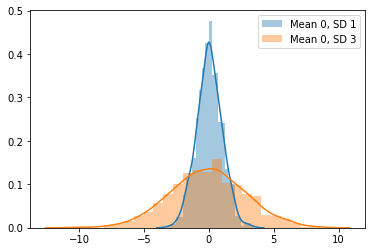

In [21]:
# Import necessary modules
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Plot of 1,000 data points from a normal distribution with mean of 0 and SD of 1 - adapted from: https://stackoverflow.com/a/51758496
value1 = np.around(np.random.normal(loc=0,scale=1,size=1000), 2)
sns.distplot(value1, label="Mean 0, SD 1")

# Plot of 1,000 data points from a normal distribution with a mean of 0 and SD of 3
value2 = np.around(np.random.normal(loc=0, scale = 3, size = 1000),2)
sns.distplot(value2, label="Mean 0, SD 3")

# Show legend
plt.legend()


There are some interesting conclusions that can be gleaned from a SD when the data is distributed normally around the mean as in the above example. Roughly 68% of all data points will lie within ±1 SD of the mean, ~95% within ±2 SD of the mean, and ~99% within ±3 SD of the mean [13]. One can evaluate that as follows:

In [22]:
'''Proportion of values within 1SD of value1 (from -1 to +1 around mean of 0)'''
# Sort array
value1.sort()

# Extract all values between -1 and +1
prop_sd1_value1 = []
for value in value1:
    if value < 1.0 and value > -1.0:
        prop_sd1_value1.append(value)
        
# Determine proportion of values
prop = len(prop_sd1_value1)/1000 * 100

# Print result
print(f"The proportion of values between ±1 SD in a normal distribution with a mean of 0 and SD of 1 is {prop:.2f}%")

The proportion of values between ±1 SD in a normal distribution with a mean of 0 and SD of 1 is 69.30%


In [23]:
'''Proportion of values within 2SD of value1 (from -2 to +2 around mean of 0)'''
# Extract all values between -1 and +1
prop_sd2_value1 = []
for value in value1:
    if value < 2.0 and value > -2.0:
        prop_sd2_value1.append(value)
        
# Determine proportion of values
prop = len(prop_sd2_value1)/1000 * 100

# Print result
print(f"The proportion of values between ±2 SD in a normal distribution with a mean of 0 and SD of 1 is {prop:.2f}%")

The proportion of values between ±2 SD in a normal distribution with a mean of 0 and SD of 1 is 95.90%


In [24]:
'''Proportion of values within 3SD of value1 (from -3 to +3 around mean of 0)'''
# Extract all values between -1 and +1
prop_sd3_value1 = []
for value in value1:
    if value < 3.0 and value > -3.0:
        prop_sd3_value1.append(value)
        
# Determine proportion of values
prop = len(prop_sd3_value1)/1000 * 100

# Print result
print(f"The proportion of values between ±3 SD in a normal distribution with a mean of 0 and SD of 1 is {prop:.2f}%")

The proportion of values between ±3 SD in a normal distribution with a mean of 0 and SD of 1 is 99.50%


Finally, the SD is used in calculating the confidence interval (CI). A CI represents a range in which some value that we are interested in determining can be found [14]. Oftentimes, a 95% CI interval is presented. As has been shown above, 2SD around a mean usually contain ~95% of all values in the sample or population (1.96SD is exactly 95%). It is this characteristic of the SD that is useful for determining a range in which a value can be found.

### Calculating standard deviation
The equation for calculating the SD of a **population** is: 
$$\sigma = \sqrt{\frac{\Sigma(x_i - \mu)}{N}}$$ where $\sigma$ represents the population SD, $x_i$ is each value in the population, $\mu$ is the population mean, and $N$ is the size of the population. 

The SD represents the spread of values around the mean, or put another way, how far a value is from the mean. This 'distance' can be represented by the difference between the value and a mean, represented as $x - \mu$, where $x$ is the value, and $\mu$ is the mean of all the data points. The mean is simply calculated by adding all the values in the data set together, and dividing by the number of values present. In other words, $\frac{\Sigma{x_i}}{N}$, where $x_i$ are each value in the data set, and $N$ is the total number of observations in the data set.

If we merely added the difference for each $x - \mu$, we would get a result of zero, because a value can be smaller or larger than the mean. For example, in an array of `[3,4,5,6,7]`, the mean is `5`. The difference between each value and the mean ($x - \mu$) in turn is `[-2, -1, 0, 1, 2]`, which when added together equals zero. To prevent this, the value for each difference is squared: $\Sigma(x - \mu)^2$. This gives a positive array for each data point: `[4, 1, 0, 1, 4]`. The sum of this is now 10. This value is divided by the number of observations in the population, $N$, before the square root is applied to arrive at the population SD, $$\sigma$$.

More frequently, a sample of a population is examined. The equation for calculating the SD of a **sample** is: 
$$s = \sqrt{\frac{\Sigma(x_i - \overline x)}{n - 1}}$$ where $s$ represents the sample SD, $x_i$ is each value in the sample, $\overline x$ is the sample mean, and $n$ is the sample size. 

The main difference between these two equations is in the denominator: population SD makes use of the *whole* population size, while sample SD makes use of the sample size minus one. It is this difference that is conveyed in the different Excel functions: `STDDEV.P` is used to calculate the SD of a *whole* population (e.g. all children in a class of interest), while `STDDEV.S` is used to calculate the SD of a *sample* of the population (e.g. a handful of children from the class of interest) [15]. Because it is often difficult to measure a complete population (either because the population is too big to measure in it's entirety, or the true size of the population is difficult to define), a sample is used. In the next section, we will use `numpy` to look at why using the sample equation (denominator $n-1$) is a better estimator of the SD than the population equation (denominator $N$).

### Sample Standard Deviation Calculation example
Let's create a dataset of random numbers on a normal distribution between 0 and 85 representing the age of a population. Let's assume that this data set represents the WHOLE population of interest.

In [25]:
#Create array
pop = np.random.randint(0, 86, 1000)
pop.sort()
#print(pop)
print(f"Values range from a minimum of {pop[0]} to {pop[-1]}, with a mean of {sum(pop)/len(pop):.1f}, and a population standard deviation of {np.std(pop):.1f}.")

Values range from a minimum of 0 to 85, with a mean of 43.2, and a population standard deviation of 24.7.


Let's now assume that we take a sample from this population, because we cannot access the whole population to measure age. Ideally, we want to get as close to the actual SD of the population as possible using the sample. We randomly sample 50 observations from the population. We repeat this sampling 50 times, and determine the average *population* SD of all these samples.

In [26]:
#Create list to store each result of population SD
avg_pop_sd = []

#Create sample and run 50 times
for i in range(50):
    sample = np.random.choice(pop, 10, replace=False)
    avg_pop_sd.append(round(np.std(sample),1))
    
#print(avg_sample_sd)
print(f"The average SD using a population calculation for a random sample of size 50 repeated 50 times from the same population is {sum(avg_pop_sd)/len(avg_pop_sd):.1f}.")
print(f"This differs from the true population SD by {abs(np.std(pop) - (sum(avg_pop_sd)/len(avg_pop_sd))):.1f}.")

The average SD using a population calculation for a random sample of size 50 repeated 50 times from the same population is 24.1.
This differs from the true population SD by 0.6.


In the next step, we repeat this process, but apply the *sample* SD calculation of $n-1$.

In [27]:
#Create list to store each result of population SD
avg_sample_sd = []

#Create sample and run 50 times
for i in range(50):
    sample = np.random.choice(pop, 10, replace=False)
    avg_sample_sd.append(round(np.std(sample, ddof=1),1))
    
#print(avg_sample_sd)
print(f"The average SD using a sample calculation for a random sample of size 50 repeated 50 times from the same population is {sum(avg_sample_sd)/len(avg_sample_sd):.1f}.")
print(f"This differs from the true population SD by {abs(np.std(pop) - (sum(avg_sample_sd)/len(avg_sample_sd))):.1f}.")

The average SD using a sample calculation for a random sample of size 50 repeated 50 times from the same population is 25.0.
This differs from the true population SD by 0.3.


### Discussion
The above indicates that the use of `STDDEV.S` offers a better approximation of the population SD than `STDDEV.P` when studying a sample of a population. When the whole population is known and measured, `STDDEV.P` should be used, as this calculates the true SD. 

***
## Task 4
The final task requires using `scikit-learn` to apply k-means clustering to Fisher's Iris dataset. 

### K-means clustering
K-means clustering is a method of unsupervised machine learning that groups together similar points in a dataset by identifying clusters of data objects in a dataset [16]. This is achieved by first telling the algorithm how many clusters (k) the data should be seperated into. The algorithm then selects k number of random points in the dataset as the centre of the starting clusters. These centres are referred to as the centroid. Each datapoint is then assigned to the nearest centroid. The algorithm then calculates the mean of all the datapoints, and repositions the centroid to this calculated value. After the new centroid is calculated, all the datapoints are again reassigned to the new nearest centroid and hence, new cluster. The process repeats until no datapoints change to new clusters, i.e. the centroid does not change [17].

Becuase the initial starting centroids are chosen at random, k-means will provide different results each time [16]. For this reason, the algorithm is usually run several times, with cluster assignments leading to the lowest sum of the squared error (SSE: the sum of the squared Euclidean distance of each point to its closest centroid) been selected as the final result [17].

### Determining starting cluster size *k*
Because k-means is a method of unsupervised machine learning, we don't usually know how many clusters, or in this case Iris species, to expect (even though we know it's three). There are two ways of determining an appropriate cluster size [17]. Here we'll look at one, the **elbow method**.

#### The elbow method
The elbow method runs through repeated k-means calculations with increasing number of k, recording the SSE for each iteration. The k is plotted against the SEE for each iteration. Because the 'best' cluster distribution is usually that with the smallest SSE, the the number k with the smallest SSE would be preferred. However, there is a trade-off between k and SSE - the smaller the cluster, the less 'meaningful' the cluster becomes. So a 'sweet spot' is usually sought, right where the SSE curve starts to bend like an elbow. Hence, the elbow method. 

In the next section, we'll look at the iris dataset and perform a k-means clustering.

### Import the Iris dataset
`scikit-learn` contains a copy of the Iris dataset. This can be imported from the `scikit-learn` package.

In [36]:
#Import necessary modules
import numpy as np
import sklearn.cluster as skcl
import matplotlib.pyplot as plt

#Import datasets (https://scikit-learn.org/stable/tutorial/basic/tutorial.html#loading-example-dataset)
from sklearn import datasets

#Load data
dataset = datasets.load_iris()
irisMeasurements = dataset.data

There are 150 entries in the dataset. Each column represents, in turn: Sepal Length (sl), Sepal Width (sw), Petal Length (pl), Petal Width (pw) [18]. In addition, the dataset has classified each observation according to the type of Iris: Iris-Setosa, Iris-Versicolour, Iris-Virginica. These are recorded as 0, 1 or 2 respectively.

In [37]:
#Display classification of each datapoint
dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Determine an appropriate number for k
We are assuming that we don't know there are 3 iris species in our data. So let's apply the elbow method and see how many clusters are 'advised'.

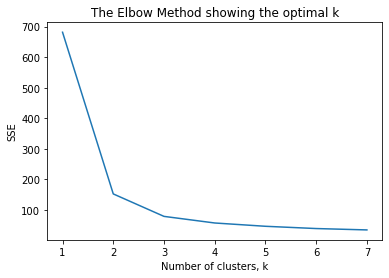

In [38]:
#Applying the elbow method [adapted from https://predictivehacks.com/k-means-elbow-method-code-for-python/]
#Create blank list to store SSE
sse = []

#Run through 7 clusters determining SSE for each
for k in range (1,8):
    kmeans = skcl.KMeans(n_clusters = k)
    kmeans.fit(irisMeasurements)
    sse.append(kmeans.inertia_)
    
#Display the results of SSE against k
plt.plot(range(1,8), sse)
plt.xlabel('Number of clusters, k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

As mentioned previously, we are looking for that sweet spot trade-off between cluster size and smallest SSE. From the above diagram, it would appear that there isn't much gain to be had above 3 clusters. So we will define 3 clusters for our kmeans clustering.

### Perform kmeans clustering on dataset

In [52]:
#Instantiate algorithm for dataset
kmIris = skcl.KMeans(n_clusters=3, random_state=0)

#Fit data
kmIris.fit(irisMeasurements)

#Check labels
kmIris.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

We can see that there is some break in the continuity of clustering of the datapoints; numbers should run consecutively, i.e. 1,1,1,...2,2,2,...0,0,0. There should be no mixing of values. We can determine the size of each  cluster identified through kmeans to see the accuracy of the clustering.

In [69]:
#Count number of items in each cluster [taken from https://stackoverflow.com/a/5829377]
from collections import Counter
Counter(kmIris.labels_)

Counter({1: 50, 2: 62, 0: 38})

The kmeans clustering was only able to identify all objects from one iris species correctly. It overestimated grouping in another species by 24% and underestimated the last by 24%. We can compare this visually to the target clusters (the 'truth').

In [70]:
#Tidy up calculate array so that same colors are used between both plots
cleanArray = []
dirty = kmIris.labels_
for i in dirty:
    if i == 1:
        cleanArray.append(0)
    if i == 2:
        cleanArray.append(1)
    if i == 0:
        cleanArray.append(2)

Text(0.5, 1.0, 'Calculated clustering')

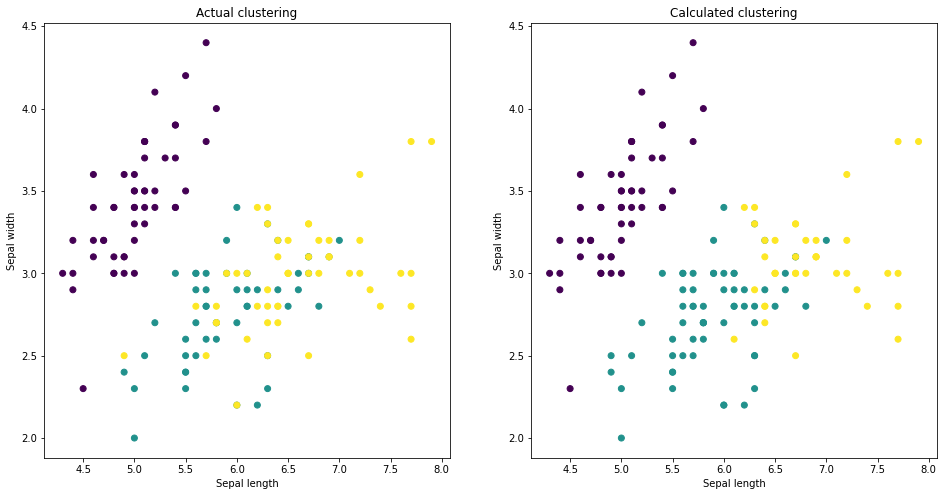

In [71]:
#Visualise actual vs calculated clusters [adapted from https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee]

#Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(16,8))

#First plot of actual clusters
axes[0].scatter(irisMeasurements[:, 0], irisMeasurements[:, 1], c=dataset['target'])
axes[0].set_xlabel('Sepal length')
axes[0].set_ylabel('Sepal width')
axes[0].set_title('Actual clustering')

#Second plot of calculated clusters
axes[1].scatter(irisMeasurements[:, 0], irisMeasurements[:, 1], c=cleanArray)
axes[1].set_xlabel('Sepal length')
axes[1].set_ylabel('Sepal width')
axes[1].set_title('Calculated clustering')



### Discussion
Kmeans clustering is a form of unsupervised machine learning. While it is useful in identifying common groupings in datasets of various shapes and sizes, it is limited by the need to identify starting number of clusters, and the fact that outliers can be excluded from the correct grouping, as seen above [20]. 

### References
[1] Wikipedia. Methods of computing square roots \[Internet\]. Wikimedia Foundation; 2020 \[Last updated 2020 October 30\]. Available from https://en.wikipedia.org/wiki/Methods_of_computing_square_roots

[2] Johnson, SG. Square Roots via Newton's Method \[published lecture notes\] MIT; 2015 February 4 \[Cited 2020 October 14\]. Available at: https://math.mit.edu/~stevenj/18.335/newton-sqrt.pdf

[3] Regmi, S. Calculating the Square Root of a Number using the  Newton-Raphson Method \[A How To Guide\]. \[Internet\] Hackernoon; 2020 \[Last updated 2020 January 18; cited 2020 October 14\] Available at https://hackernoon.com/calculating-the-square-root-of-a-number-using-the-newton-raphson-method-a-how-to-guide-yr4e32zo

[4] Python Software Foundation. decimal — Decimal fixed point and floating point arithmetic \[Internet\]. Python Software Foundation; 2020. \[Last updated 2020 October 31; cited 2020 October 10\]. Available at https://docs.python.org/3.8/library/decimal.html

[5] Arobelidze, A. How to find the square root of a number and calculate it by hand \[Internet\]. USA: FreeCodeCamp; 2020 \[Last updated 2020 February 6; cited 2020 October 16\] Available at https://www.freecodecamp.org/news/find-square-root-of-number-calculate-by-hand/

[6] Nemirof, R and Bonnell, J. The Square Root of Two to 1 Million Digits \[Internet\].  - https://apod.nasa.gov/htmltest/gifcity/sqrt2.1mil

[7] https://en.wikipedia.org/wiki/Chi-squared_test

[8] https://statistics.laerd.com/spss-tutorials/chi-square-test-for-association-using-spss-statistics.php

[9] https://www.statisticshowto.com/probability-and-statistics/chi-square/

[10] https://towardsdatascience.com/gentle-introduction-to-chi-square-test-for-independence-7182a7414a95#92ef

[11] https://www.statisticshowto.com/probability-and-statistics/standard-deviation/#SDD

[12] https://en.wikipedia.org/wiki/Standard_deviation

[13] https://www.investopedia.com/terms/e/empirical-rule.asp

[14] https://www.mathsisfun.com/data/confidence-interval.html

[15] https://support.microsoft.com/en-us/office/stdev-s-function-7d69cf97-0c1f-4acf-be27-f3e83904cc23

[16] https://www.scss.tcd.ie/~munnellg/projects/kmeans.html

[17] https://realpython.com/k-means-clustering-python/

[18] https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

[19] https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

[20] https://developers.google.com/machine-learning/clustering/algorithm/advantages-disadvantages